In [8]:
#Importing Libraries
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

In [2]:
import pandas as pd

def remove_empty_and_space(text):
    return [lab.strip() for lab in text if lab]

# Read CSV file and preprocess
df = pd.read_csv('/content/Evaluation-dataset.csv', header=None).fillna('')
df.columns = ['text'] + [f'label_{i}' for i in range(1, 15)]

df['target'] = df.iloc[:, 1:15].values.tolist()

#remove empty spaces
df['target'] = df['target'].map(remove_empty_and_space)


In [3]:
# Select relevant columns
df = df[['text', 'target']]

# Calculate the number of labels in each 'target' list
df['target_counts'] = df['target'].apply(len)

# Print the number of rows in the DataFrame
print(f"There are {df.shape[0]} rows in the data")


There are 10132 rows in the data


<ipython-input-3-bf21f24bcf3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_counts'] = df['target'].apply(len)


In [4]:
df.head()

,text,target,target_counts
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2
2,Very easy to use and good value for money.,[value for money positive],1
3,Really easy and convenient to arrange,[ease of booking positive],1
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3


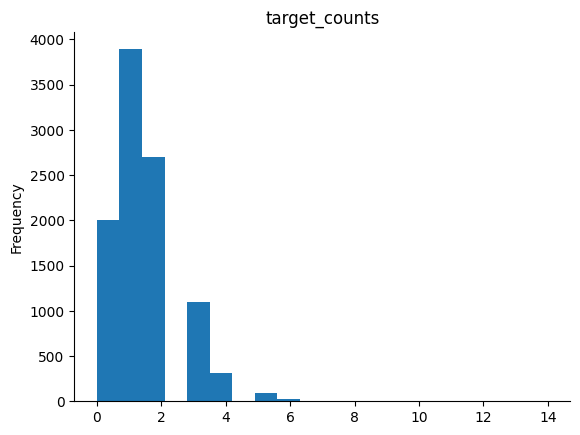

In [5]:
# @title target_counts

from matplotlib import pyplot as plt
df['target_counts'].plot(kind='hist', bins=20, title='target_counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           10132 non-null  object
 1   target         10132 non-null  object
 2   target_counts  10132 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 237.6+ KB


In [7]:
df.isnull()


,text,target,target_counts
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10127,False,False,False
10128,False,False,False
10129,False,False,False
10130,False,False,False


In [9]:
df.describe()

,target_counts
count,10132.000000
mean,1.435551
std,1.123282
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


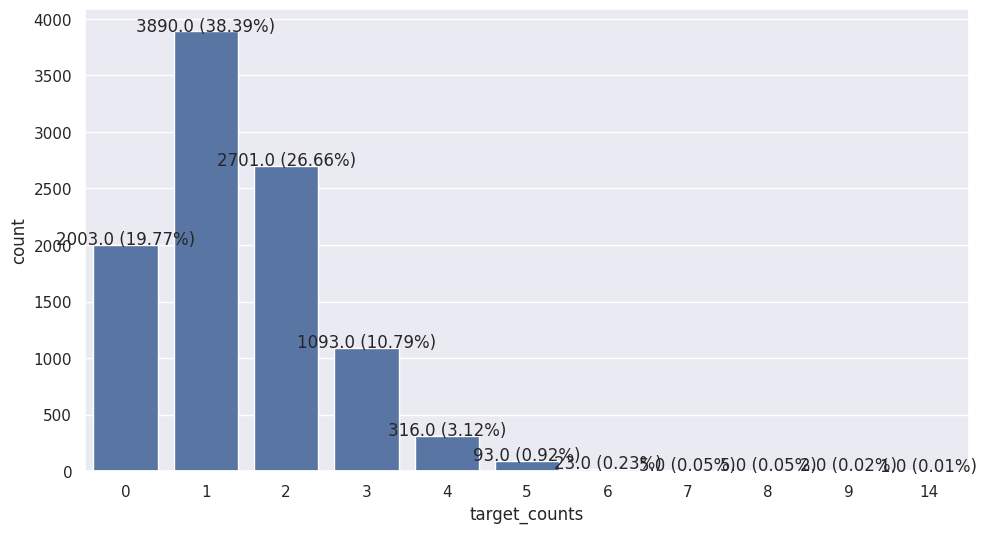

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
sns.set(rc={'figure.figsize': (11.4, 6)})

# Create the count plot for 'target_counts'
plot = sns.countplot(x=df['target_counts'])

# Get the total number of rows
total_count = df['target_counts'].size

# Annotate each bar with the count and percentage
for bar in plot.patches:
    bar_height = bar.get_height()
    percent = (bar_height / total_count) * 100
    plot.text(bar.get_x() + bar.get_width() / 2, bar_height + 3,
              f'{bar_height} ({percent:.2f}%)', ha='center')

# Show the plot
plt.show()


In [11]:
df[df.target_counts == 14]

,text,target,target_counts
384,"test review, should be deleted","[refund not actioned positive, refund timescal...",14


In [12]:
# Drop the row with index 384
df = df.drop([384])

# Print the new shape of the DataFrame
print(f"Shape of DataFrame after removing outlier: {df.shape}")


Shape of DataFrame after removing outlier: (10131, 3)


In [13]:
print("Number of Unique labels - {}".format(len(df.target.explode().unique())))


Number of Unique labels - 99


In [16]:
import pandas as pd

# Set display options to show all rows, columns, and wide content without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Create a DataFrame showing the count of each value in 'target' column
target_counts = pd.DataFrame.from_dict(dict(df['target'].explode().value_counts()), orient='index', columns=['Count'])

# Display the result
print(target_counts)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Count
value for money positive                                                                                                                                                                                                                                                                                                                                                                                                                                               4780
garage service positive                                                         

In [17]:
def get_noisy_labels(df):
    noisy_labels = []
    for label,count in Counter(df.target.explode()).items():
        if count < 5:
            if 'positive' not in label.split():
                if 'negative' not in label.split():
                    noisy_labels.append(label)
    return noisy_labels

# to remove nosiy labels from the dataframe
def remove_noisy_labels(df):
    #print("Removing noisy labels...")
    noisy_labels = get_noisy_labels(df)
    print("Number of Noisy Labels - {}".format(len(noisy_labels)))
    for i in range(len(df)):
        for nLabel in noisy_labels:
            if nLabel in df.iloc[i,1]:
                df.iloc[i,1].remove(nLabel)

    # to remove datapoints that doesn't have any labels
    df = df[df["target"].str.len() != 0]

    return df

df = remove_noisy_labels(df)


Number of Noisy Labels - 44


In [ ]:
ax=sns.countplot(df.target_counts)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{}({:1.2f}%)'.format(height,(height/len(df.target_counts))*100),
            ha="center")


In [19]:
print("Number of Unique labels after removing noisy labels - {}".format(len(df.target.explode().unique())))


Number of Unique labels after removing noisy labels - 54


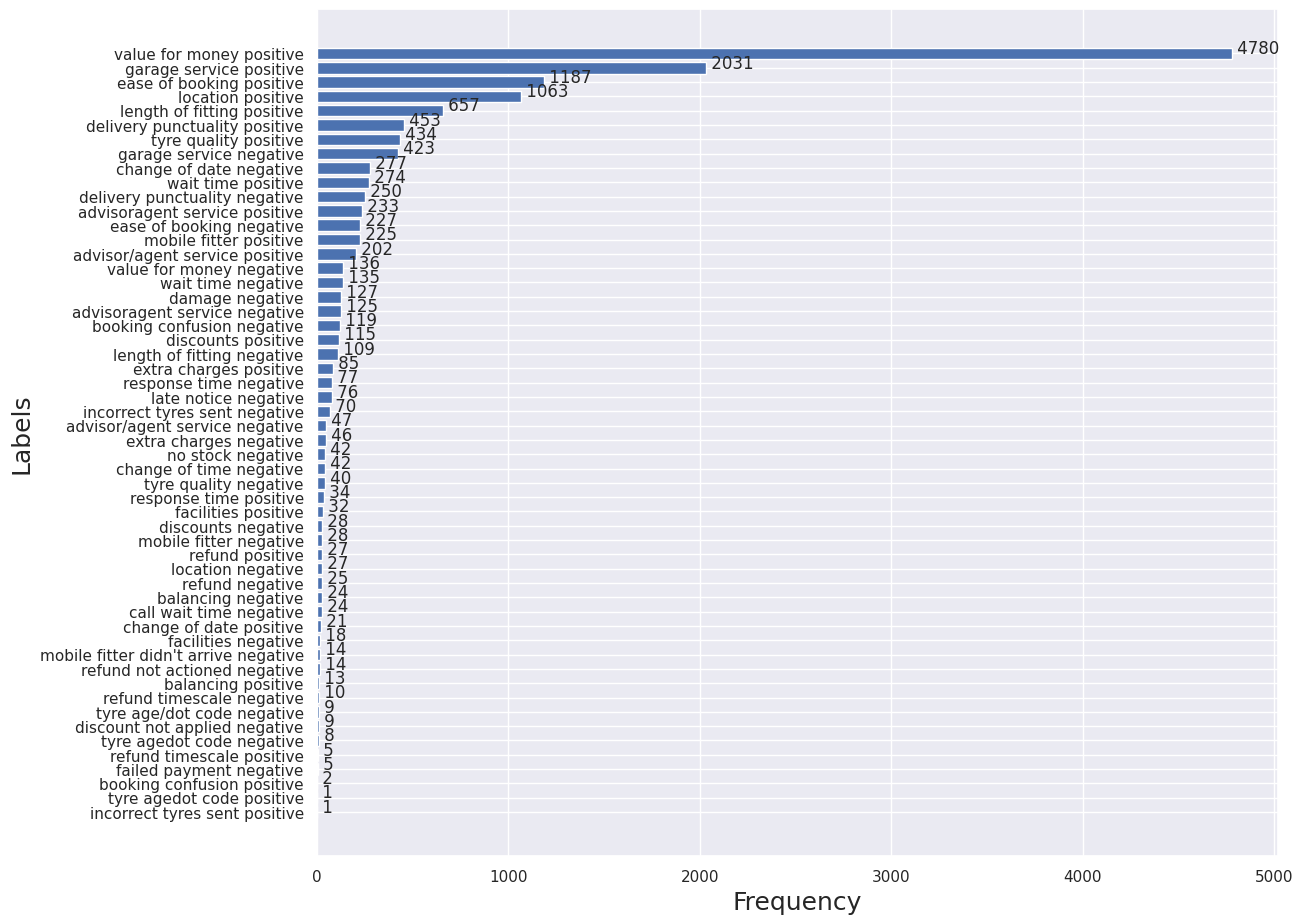

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each label in 'target' column and sort by frequency
label_counts = dict(sorted(Counter(df['target'].explode()).items(), key=lambda item: item[1]))

# Set the size of the plot
plt.figure(figsize=(12.4, 11.00))

# Create a horizontal bar plot
plt.barh(range(len(label_counts)), label_counts.values(), align='center')
plt.yticks(range(len(label_counts)), label_counts.keys())
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Labels', fontsize=18)

# Annotate each bar with its frequency
for index, value in enumerate(label_counts.values()):
    plt.text(value, index, ' ' + str(value))

# Show the plot
plt.show()


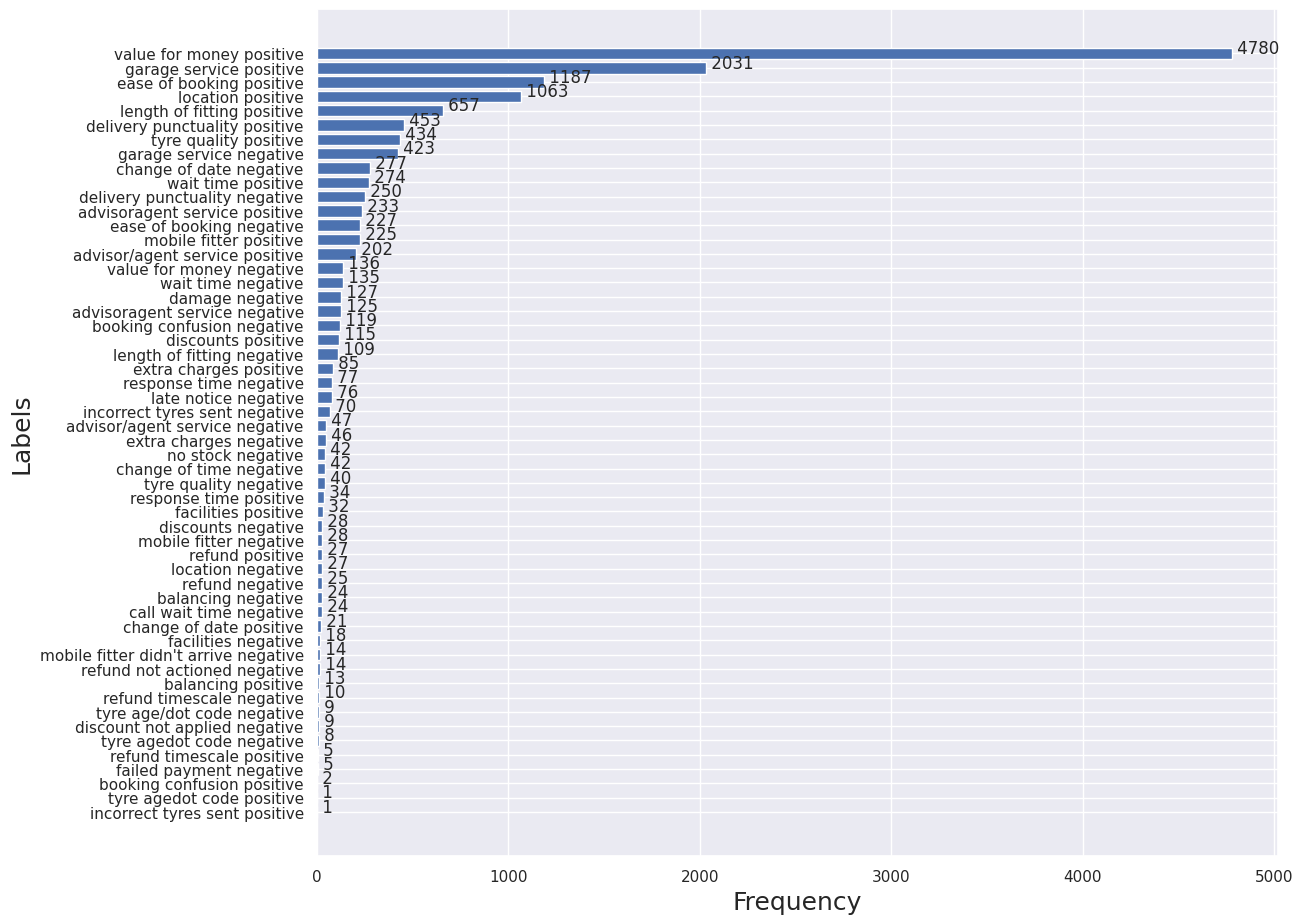

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each label in 'target' column and sort by frequency
label_counts = dict(sorted(Counter(df['target'].explode()).items(), key=lambda item: item[1]))

# Set the size of the plot
plt.figure(figsize=(12.4, 11.00))

# Create a horizontal bar plot
plt.barh(range(len(label_counts)), label_counts.values(), align='center')
plt.yticks(range(len(label_counts)), label_counts.keys())
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Labels', fontsize=18)

# Annotate each bar with its frequency
for index, value in enumerate(label_counts.values()):
    plt.text(value, index, ' ' + str(value))

# Show the plot
plt.show()


In [22]:
def replace_label(df, src, trg):
    # Replace labels in 'target' column
    df['target'] = df['target'].apply(lambda texts: [lab if lab != src else trg for lab in texts])

def combine_labels(df, min_samples=100):
    # Get label counts and names
    label_counts = df['target'].explode().value_counts()
    label_names = label_counts.index

    # Identify labels with fewer samples
    fewer_labels = [label for label, count in label_counts.items() if count < min_samples]

    def replace_fewer(labels):
        # Replace labels with fewer samples
        return ['extra ' + label.split(' ')[-1] if label in fewer_labels else label for label in labels]

    # Apply label replacement function
    df['target'] = df['target'].apply(replace_fewer)

    return df

# Replace specific labels
replace_label(df, 'advisor/agent service positive', 'advisoragent service positive')
replace_label(df, 'advisor/agent service negative', 'advisoragent service negative')
replace_label(df, 'tyre age/dot code negative', 'tyre agedot code negative')

# Combine labels with fewer samples
df = combine_labels(df)


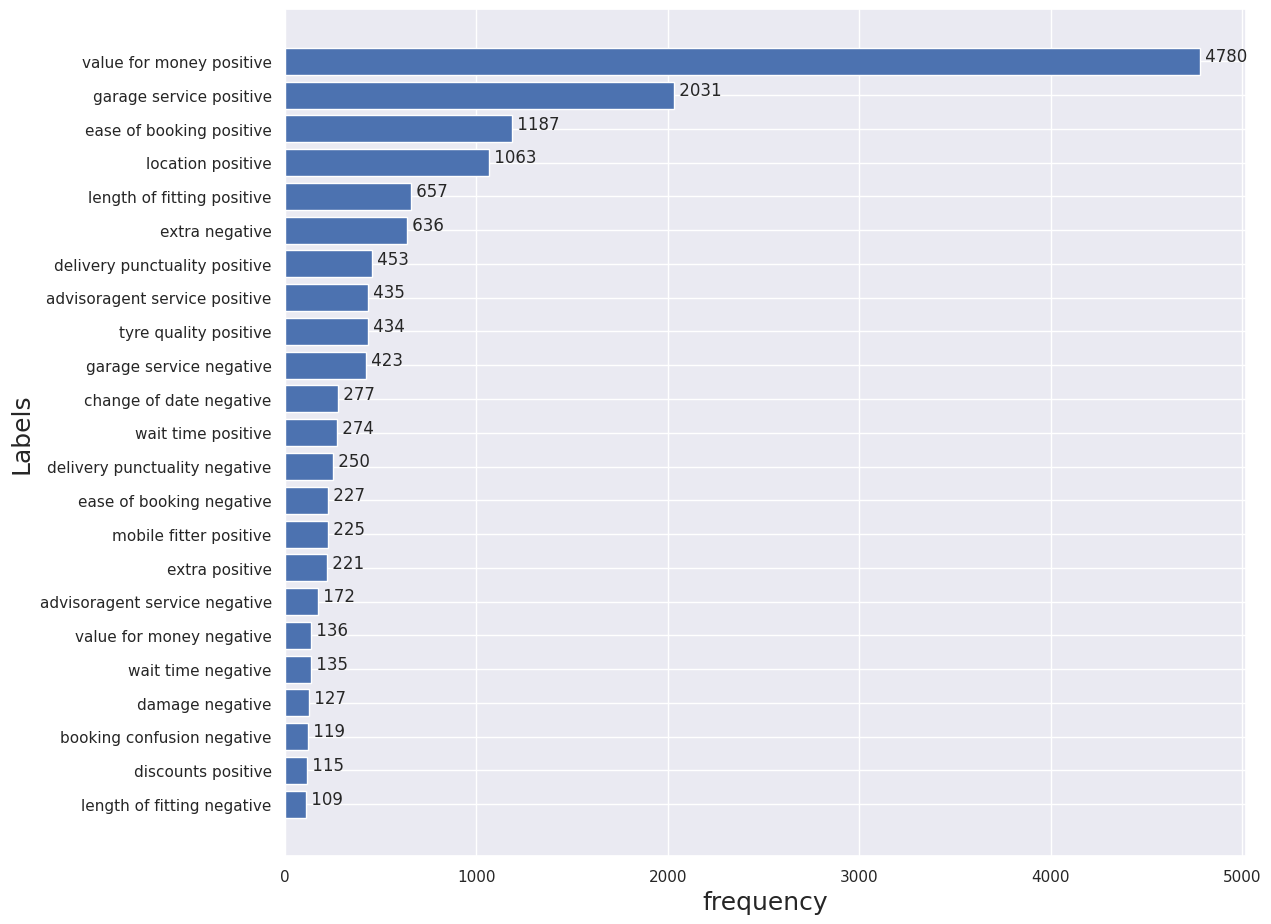

In [23]:
d = dict(Counter(df.target.explode()))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

sns.set(rc={'figure.figsize':(12.4,11.00)})
plt.barh(range(len(d)), d.values(), align='center')
plt.yticks(range(len(d)), d.keys())
plt.xlabel('frequency', fontsize=18)
plt.ylabel('Labels', fontsize=18)

for index, value in enumerate(d.values()):
    plt.text(value, index, ' '+str(value))

plt.show()


In [24]:
#Under Sampling
# Calculate the number of rows after removing data points with 0 labels and noisy labels
num_rows_after_filtering = df.shape[0]
print("Number of rows after removing data points with 0 labels and noisy labels:", num_rows_after_filtering)


Number of rows after removing data points with 0 labels and noisy labels: 8124


In [25]:
# Filter the DataFrame to select rows where 'target' column is ['value for money positive']
filtered_df = df[df['target'].apply(lambda x: x == ['value for money positive'])]

# Get the number of rows in the filtered DataFrame
num_rows_filtered = filtered_df.shape[0]

# Print the number of rows with only 'value for money positive' as the label
print("Number of rows with only 'value for money positive' as the label:", num_rows_filtered)


Number of rows with only 'value for money positive' as the label: 2143


In [26]:

filtered_data = df[df['target'].apply(lambda x: x == ['garage service positive'])]

# Count the number of rows in the filtered data
num_rows_filtered = filtered_data.shape[0]
print("Count of rows having only 'garage service positive' as the label:", num_rows_filtered)


Count of rows having only 'garage service positive' as the label: 558
